## Question_1

In [1]:
import nltk
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\최보경\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
from nltk.corpus import gutenberg
files_en = gutenberg.fileids() 
files_en

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
doc_en = gutenberg.open('shakespeare-hamlet.txt').read() #열고 바로 읽는다
doc_en[0:500]

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon your houre\n\n   Bar. 'Tis now strook twelue, get thee to bed Francisco\n\n   Fran. For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn. Haue you had quiet Guard?\n  Fran. Not"

### 1_Text Preprocessing

In [5]:
def review_to_wordlist(review, remove_stopwords=False):
    # 1. Remove HTML
    review_text = BeautifulSoup(review, "lxml").get_text()

    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()

    # 4. Optionally remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    # 5. Return a list of words
    return(words)

In [6]:
tokens_en=review_to_wordlist(doc_en)

In [7]:
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\최보경\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#6 stemming
snowball_stemmer = nltk.stem.SnowballStemmer('english')
snowball_list = [snowball_stemmer.stem(w) for w in tokens_en]

#### 2_(단어,품사) Tuple 생성

In [9]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\최보경\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
tags_en = nltk.pos_tag(snowball_list)
tags_en[:10]

[('the', 'DT'),
 ('tragedi', 'NN'),
 ('of', 'IN'),
 ('hamlet', 'NN'),
 ('by', 'IN'),
 ('william', 'JJ'),
 ('shakespear', 'JJ'),
 ('actus', 'NN'),
 ('primus', 'NN'),
 ('scoena', 'NN')]

In [11]:
type(tags_en)

list

### 3_Noun Frequency

In [12]:
noun_fd=[wt for (wt, x) in tags_en
         if x in['NN','NNP','NNS']]

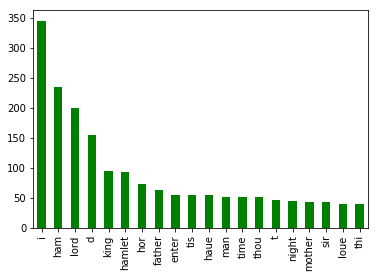

In [18]:
from pandas import Series
count_Series=Series(noun_fd).value_counts()[:20]
count_Series.plot(kind='bar',color='green')

### 4_Verb Frequency

In [14]:
verb_fd=[wt for (wt, x) in tags_en
         if x in['VB','VBD','VBG','VBN','VBP','VBZ']]

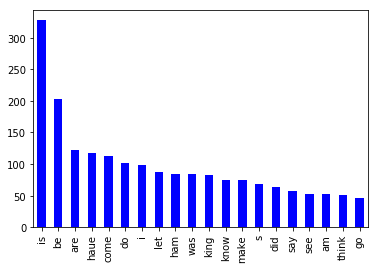

In [15]:
from pandas import Series
count_Series=Series(verb_fd).value_counts()[:20]
count_Series.plot(kind='bar',color='blue')

### 5_Adjective Frequency

In [16]:
adj_fd=[wt for (wt, x) in tags_en
         if x in['JJ','JJR','JJS']]

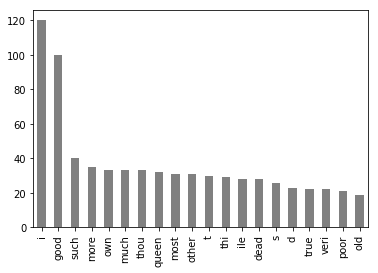

In [17]:
from pandas import Series
count_Series=Series(adj_fd).value_counts()[:20]
count_Series.plot(kind='bar',color='gray')